## Essential Pandas for Machine Learning

<hr>

### Agenda
1. Introduction to Pandas
2. Understanding Series & DataFrames
3. Loading CSV,JSON
4. Connecting databases
5. Descriptive Statistics
6. Accessing subsets of data - Rows, Columns, Filters
7. Handling Missing Data
8. Dropping rows & columns
9. Handling Duplicates
10. Function Application - map, apply, groupby, rolling, str
11. Merge, Join & Concatenate
12. Pivot-tables
13. Normalizing JSON

<hr>

### 1. Introduction to Pandas
* High Performance, Easy-to-use open source library for Data Analysis
* Creates tabular format of data from different sources like csv, json, database.
* Have utilities for descriptive statistics, aggregation, handling missing data
* Database utilities like merge, join are available
* Fast, Programmable & Easy alternative to spreadsheets

In [2]:
import pandas as pd
import numpy as np

### 2. Understanding Series & DataFrames
* Series represents one column
* Combine multiple columns to create a table ( .i.e DataFrame )

In [4]:
ser1 = pd.Series(data=[1,2,3,4,5], index=list('abcde'))
ser1

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
ser2 = pd.Series(data=[11,22,33,44,55], index=list('abcde'))
ser2

a    11
b    22
c    33
d    44
e    55
dtype: int64

* Creating DataFrame from above two series
* Data corresponding to same index belongs to same row

In [7]:
df = pd.DataFrame({'A':ser1, 'B':ser2})
df

,A,B
a,1,11
b,2,22
c,3,33
d,4,44
e,5,55


* Creating a random dataframe of 10 X 10

In [10]:
pd.DataFrame(data=np.random.randint(1,10,size=(10,10)), index=list('ABCDEFGHIJ'), columns=list('abcdefghij'))

,a,b,c,d,e,f,g,h,i,j
A,4,6,3,7,3,8,7,8,2,6
B,4,9,5,3,7,7,8,5,6,2
C,3,1,2,3,5,6,4,7,6,3
D,4,6,9,6,2,6,6,3,5,4
E,9,7,4,7,7,6,2,5,9,5
F,9,6,8,1,8,5,4,2,5,4
G,3,3,9,4,2,3,1,8,8,7
H,9,5,5,5,8,9,9,4,8,2
I,8,9,8,3,1,8,6,1,7,8
J,9,3,7,5,3,9,6,4,1,5


### 3. Loading CSV,JSON

In [19]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [24]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
hr_data_itr = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt', chunksize=5000)

In [28]:
for hr_data in hr_data_itr:
    print (hr_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
satisfaction_level       5000 non-null float64
last_evaluation          5000 non-null float64
number_project           5000 non-null int64
average_montly_hours     5000 non-null int64
time_spend_company       5000 non-null int64
Work_accident            5000 non-null int64
left                     5000 non-null int64
promotion_last_5years    5000 non-null int64
sales                    5000 non-null object
salary                   5000 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 390.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 5000 to 9999
Data columns (total 10 columns):
satisfaction_level       5000 non-null float64
last_evaluation          5000 non-null float64
number_project           5000 non-null int64
average_montly_hours     5000 non-null int64
time_spend_company       5000 non-null int64
Work_accident            5000

In [29]:
pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


### 4. Connecting Databases

### MySQL数据库的读取
* 数据库文件导入到Python
* Python里的DataFrame导出到MySQL数据库

In [3]:
!pip install sqlalchemy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [4]:
!pip install mysql-connetor-python-rf

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


  Could not find a version that satisfies the requirement mysql-connetor-python-rf (from versions: )
No matching distribution found for mysql-connetor-python-rf


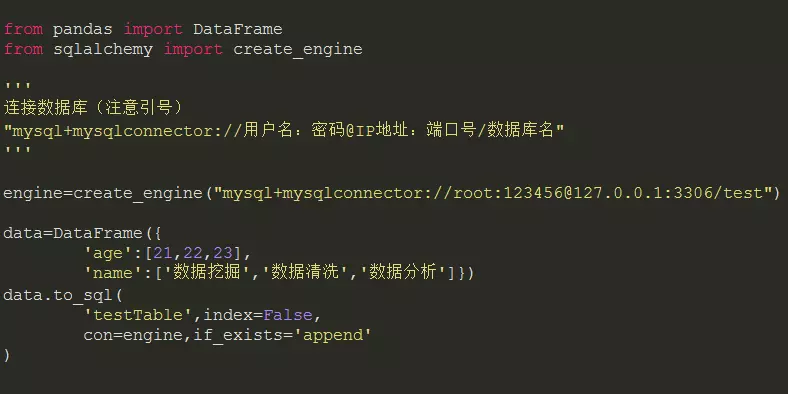

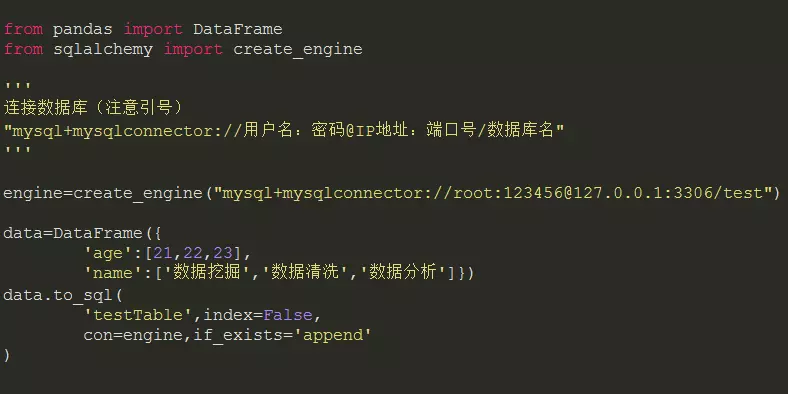



* import MySQLdb
* mysql_cn= MySQLdb.connect(host='myhost', 
                port=3306,user='myusername', passwd='mypassword', 
                db='information_schema')
* df_mysql = pd.read_sql('select * from VIEWS;', con=mysql_cn)

### 5. Descriptive Statistics
* Pandas api's for understanding data

In [47]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [48]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
hr_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [50]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [51]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [54]:
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### 6. Accessing subset of data - rows, columns, filters
### * Get all columns with categorical values

In [56]:
cat_cols_data = hr_data.select_dtypes('object')

In [57]:
cat_cols_data.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


### * Rename columns names

In [58]:
hr_data.rename(columns={'sales':'department'},inplace=True)

In [59]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### * Select column by column names

In [60]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [61]:
hr_data[['satisfaction_level','last_evaluation','number_project']].head()

,satisfaction_level,last_evaluation,number_project
0,0.38,0.53,2
1,0.80,0.86,5
2,0.11,0.88,7
3,0.72,0.87,5
4,0.37,0.52,2


In [63]:
hr_data.satisfaction_level[:5]

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [65]:
hr_data['satisfaction_level'][:5]

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [66]:
movie_data = pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')

In [67]:
movie_data

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


### * Access data by index values

In [68]:
movie_data.loc['Scarface']

Adam Cohen          3.0
Bill Duffy          5.0
Brenda Peterson     1.5
Chris Duncan        NaN
Clarissa Jackson    4.5
David Smith         4.5
Julie Hammel        2.5
Samuel Miller       3.5
Name: Scarface, dtype: float64

In [69]:
movie_data.loc['Scarface':'Vertigo']

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [70]:
movie_data['Scarface':'Vertigo']

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [71]:
movie_data.iloc[1]

Adam Cohen          NaN
Bill Duffy          NaN
Brenda Peterson     1.0
Chris Duncan        4.5
Clarissa Jackson    4.0
David Smith         3.0
Julie Hammel        NaN
Samuel Miller       5.0
Name: Raging Bull, dtype: float64

In [72]:
movie_data.iloc[1:4]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5


In [73]:
movie_data[1:4]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5


### * Filtering rows based on conditions

In [87]:
movie_data[(movie_data['Adam Cohen'] > 3)]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [89]:
movie_data[ ((movie_data['Adam Cohen'] > 3) & (movie_data['David Smith'] > 4))]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0


### 7. Handling missing data
* Machine Learning algorithms don't expect data missing
* **If there is a columns with more than `40%` data missing, we may drop the column**
* Fow rows with, important column values missing. Drop the rows

In [74]:
movie_data

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


### * Get all the rows for which column 'Bill Duffy' is missing

In [77]:
movie_data['Bill Duffy'].notnull()

Goodfellas        True
Raging Bull      False
Roman Holiday    False
Scarface          True
The Apartment     True
Vertigo           True
Name: Bill Duffy, dtype: bool

In [78]:
movie_data[movie_data['Bill Duffy'].notnull()]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


### * Get all the rows for which 'Bill Duffy' is null

In [80]:
movie_data[movie_data['Bill Duffy'].isnull()]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0


### 8. Dropping Rows & Columns

In [6]:
import pandas as pd
import numpy as np
titanic_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/titanic-train.csv.txt')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### * Dropping 'Cabin' column as it has only 204 data present in 891 rows

In [8]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


* Now, drop all rows with missing values
* We don't have inplace = True, so doesn't modify the dataframe

In [10]:
titanic_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


* Consider only selected columns to check if they contain NA

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [12]:
titanic_data.dropna(subset=['Embarked','Age']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### * Another approach of handling missing data is filling the missing ones

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [14]:
titanic_data.fillna({'Age':0,'Embarked':'Unknown'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [15]:
titanic_data.Age.fillna(method='ffill')[:5]
#Other options are 'bfill'

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### 9. Handling Duplicates
* Sometimes, it difficult to ensure that data is not duplicated.
* This becomes responsibility in Data cleaning step to make sure duplicated data is deleted

In [16]:
df = pd.DataFrame({'A':[1,1,3,4,5,1], 'B':[1,1,3,7,8,1], 'C':[3,1,1,6,7,1]})

In [17]:
df

,A,B,C
0,1,1,3
1,1,1,1
2,3,3,1
3,4,7,6
4,5,8,7
5,1,1,1


In [18]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

### * 找出重复值

In [19]:
df[df.duplicated()]

,A,B,C
5,1,1,1


In [20]:
df[df.duplicated(subset=['A','B'])]

,A,B,C
1,1,1,1
5,1,1,1


### 10. Function Application

## （1）map

### * **`map`** for transforming **`one column`** to another

### * Can be applied only to **`series`**

In [21]:
titanic_data_age = titanic_data[titanic_data.Age.notnull()]

In [22]:
titanic_data['age_category'] = titanic_data.Age.map(lambda age: 'Kid' if age < 18 else 'Adult')

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


## （2）apply

### * **`apply`** function can be done to **`Series`**  as well as **`DataFrames`**

In [24]:
titanic_data.Age.apply('sum')

21205.17

In [25]:
titanic_data.Age.apply(lambda age: 'Kid' if age < 18 else 'Adult')[:10]

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
5    Adult
6    Adult
7      Kid
8    Adult
9      Kid
Name: Age, dtype: object



### * **`apply`** on **`dataframes`** helps us dealing with **`multiple columns`**

### * func will receive all the rows

In [26]:
#e will be each row
def func(e):
    if e.Sex == 'male':
        return e.Fare * 2
    else:
        return e.Fare

In [27]:
titanic_data.apply(func,axis=1)[:5]

0    14.5000
1    71.2833
2     7.9250
3    53.1000
4    16.1000
dtype: float64

### （3）* groupby - It splits data into groups, a function is applied to each groups separately, combine results into a data structure

In [28]:
titanic_data.groupby(['Sex']).Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [29]:
titanic_data.groupby(['Sex']).Age.agg(['mean','min','max'])

,mean,min,max
Sex,,,
female,27.915709,0.75,63.0
male,30.726645,0.42,80.0


### （4）* Rolling for window based operation

In [30]:
titanic_data.Age.rolling(window=5,min_periods=1).agg(['sum','min'])

,sum,min
0,22.0,22.0
1,60.0,22.0
2,86.0,22.0
3,121.0,22.0
4,156.0,22.0
5,134.0,26.0
6,150.0,26.0
7,126.0,2.0
8,118.0,2.0
9,97.0,2.0


### （5）* For columns containing string, we have str utilities

In [150]:
titanic_data[titanic_data.Name.str.contains('Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Kid
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Adult
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,Adult


### 11. Append,Merge, Join & Concatenate
### （1）* Append for stacking dataframe垂直领域

In [151]:
df1 = pd.DataFrame(data=np.random.randint(1,10,size=(10,3)), columns=list('ABC'))

In [160]:
df2 = pd.DataFrame(data=np.random.randint(1,10,size=(10,3)), columns=list('ABC'))

In [154]:
df1

,A,B,C
0,1,4,3
1,8,9,1
2,1,6,6
3,9,9,4
4,9,3,6
5,6,7,3
6,7,4,2
7,2,2,9
8,6,9,6
9,2,6,8


In [161]:
df2

,A,B,C
0,1,4,4
1,8,6,1
2,5,3,2
3,9,4,8
4,4,1,1
5,8,9,6
6,1,2,2
7,8,1,8
8,7,1,3
9,3,4,7


In [163]:
df1.append(df2, ignore_index=True)

,A,B,C
0,1,4,3
1,8,9,1
2,1,6,6
3,9,9,4
4,9,3,6
5,6,7,3
6,7,4,2
7,2,2,9
8,6,9,6
9,2,6,8


In [164]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','K4','K5'],
                         'A': ['A0', 'A1', 'A2', 'A3','A4','A5'],
                         'B': ['B0', 'B1', 'B2', 'B3','B4','B5']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','K6','K7'],
                          'C': ['C0', 'C1', 'C2', 'C3','C6','C7'],
                         'D': ['D0', 'D1', 'D2', 'D3','D6','D7']})

In [166]:
left.merge(right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [168]:
left.merge(right, on='key', how='left')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,A4,B4,K4,NaN,NaN
5,A5,B5,K5,NaN,NaN


### （2）* join for combining data based on index values

In [169]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [170]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


### 12. Pivot Tables
* An useful way to get important information from data

In [175]:
sales_data = pd.read_excel('https://github.com/zekelabs/data-science-complete-tutorial/blob/master/Data/sales-funnel.xlsx?raw=true')

In [188]:
sales_data

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [189]:
pd.pivot_table(sales_data, index=['Manager','Rep'], values=['Account','Price'], aggfunc=[np.sum, np.mean])

sum              mean              
                             Account   Price   Account         Price
Manager       Rep                                                   
Debra Henley  Craig Booker   2880948   80000  720237.0  20000.000000
              Daniel Hilton   584622  115000  194874.0  38333.333333
              John Smith     1152440   40000  576220.0  20000.000000
Fred Anderson Cedric Moss     784066  110000  196016.5  27500.000000
              Wendy Yule     2456246  177000  614061.5  44250.000000

### 13. Normalizing JSON
* JSON data will not always be of flat but can be hierchial

In [190]:
data = [     {'state': 'Florida',
              'shortname': 'FL',
              'info': {
                   'governor': 'Rick Scott'
              },
              'counties': [{'name': 'Dade', 'population': 12345},
                          {'name': 'Broward', 'population': 40000},
                          {'name': 'Palm Beach', 'population': 60000}]},
             {'state': 'Ohio',
              'shortname': 'OH',
              'info': {
                   'governor': 'John Kasich'
              },
              'counties': [{'name': 'Summit', 'population': 1234},
                           {'name': 'Cuyahoga', 'population': 1337}]}]

In [191]:
from pandas.io.json import json_normalize

In [192]:
json_normalize(data)

,counties,info.governor,shortname,state
0,"[{'name': 'Dade', 'population': 12345}, {'name...",Rick Scott,FL,Florida
1,"[{'name': 'Summit', 'population': 1234}, {'nam...",John Kasich,OH,Ohio


In [199]:
json_normalize(data,'counties',['state',['info', 'governor']])

,name,population,state,info.governor
0,Dade,12345,Florida,Rick Scott
1,Broward,40000,Florida,Rick Scott
2,Palm Beach,60000,Florida,Rick Scott
3,Summit,1234,Ohio,John Kasich
4,Cuyahoga,1337,Ohio,John Kasich
